# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head(5)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


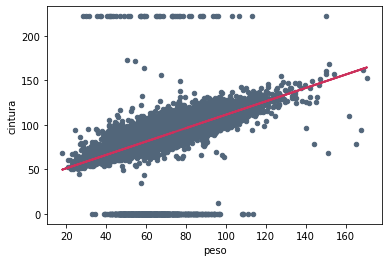

In [3]:
lm = linear_model.LinearRegression()
X= pd.DataFrame(df['peso'])
Y= pd.DataFrame(df['cintura'])
df.plot(kind='scatter', x='peso', 
        y='cintura', color ='#52667a')

df.fillna(0, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

model_lm = lm.fit(X,Y)

plt.plot(X,model_lm.predict(X),
        linewidth=2, color='#cc315c')

In [4]:
df2=df[['peso','cintura']]
df2['reg'] = model_lm.predict(X)
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,peso,cintura,reg
0,73.70,98.70,91.732310
1,35.65,64.00,63.106737
2,54.80,67.60,77.513563
3,33.40,60.60,61.414029
4,97.95,113.00,109.975942
...,...,...,...
18635,75.80,93.00,93.312171
18636,69.40,103.05,88.497357
18637,46.75,71.35,71.457430
18638,59.05,99.95,80.710900


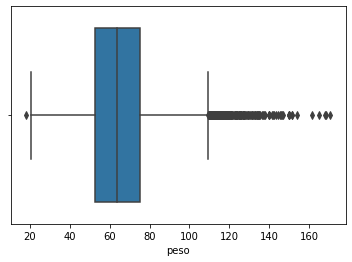

In [5]:
sns.boxplot( x='peso', data = df)

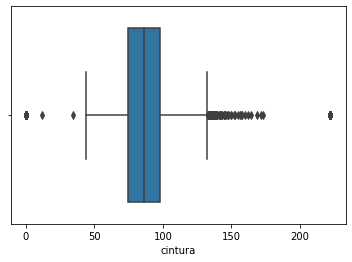

In [6]:
sns.boxplot( x='cintura', data = df)

In [7]:
df2['res'] = model_lm.predict(X) - df[['cintura']]
df2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,peso,cintura,reg,res
0,73.70,98.70,91.732310,-6.967690
1,35.65,64.00,63.106737,-0.893263
2,54.80,67.60,77.513563,9.913563
3,33.40,60.60,61.414029,0.814029
4,97.95,113.00,109.975942,-3.024058
...,...,...,...,...
18635,75.80,93.00,93.312171,0.312171
18636,69.40,103.05,88.497357,-14.552643
18637,46.75,71.35,71.457430,0.107430
18638,59.05,99.95,80.710900,-19.239100


In [8]:
import statsmodels.api as sm
model=sm.OLS.from_formula('X~Y', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9549.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:05:56   Log-Likelihood:                -76115.
No. Observations:               18640   AIC:                         1.522e+05
Df Residuals:                   18638   BIC:                         1.522e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4016      0.405     65.158      0.000      25.607      27.196
Y              0.4503      0.005     97.717      0.000       0.441       0.459
==============================================================================
Omnibus:                     2819.208   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11210.483
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       6.521   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
vars=['peso','cintura','diastol','sistol']
df[vars].corr()

,peso,cintura,diastol,sistol
peso,1.000000,0.582035,0.358054,0.353440
cintura,0.582035,1.000000,0.308142,0.351695
diastol,0.358054,0.308142,1.000000,0.663961
sistol,0.353440,0.351695,0.663961,1.000000


In [10]:
df.rename(columns={'desc_ent':'Estado', 'entidad':'Entidad'},inplace=True ) 
df

,folio,intp,Entidad,Estado,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,...,18:00,1,18:05,1,R3002,5,3,1,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,...,18:40,1,18:40,1,M0408,5,3,1,195.314670,45
18637,301099,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,...,8:00,3,23:00,1,M3024,2,1,2,1758.912979,302
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,...,6:02,3,6:02,1,M2512,3,2,1,2354.581350,253


In [11]:
print(df.iloc[:8,0:8])

    folio  intp  Entidad            Estado  sexo  edad  meses   peso
0  210295     2       21            PUEBLA     2    38      8  73.70
1  101655     3       10           DURANGO     2    11     11  35.65
2   10287     6        1    AGUASCALIENTES     2    18      8  54.80
3   91526     4        9  DISTRITO FEDERAL     1    10      8  33.40
4  210939     3       21            PUEBLA     2    19      3  97.95
5  241555     3       24   SAN LUIS POTOSI     1    10      7  31.90
6  211879     2       21            PUEBLA     2    10      9  31.95
7   80135     3        8         CHIHUAHUA     2    11      9  32.40


In [12]:
df.groupby(['Estado']).size()

Estado
AGUASCALIENTES                     655
BAJA CALIFORNIA                    564
BAJA CALIFORNIA SUR                530
CAMPECHE                           541
CHIAPAS                            608
CHIHUAHUA                          587
COAHUILA DE ZARAGOZA               612
COLIMA                             599
DISTRITO FEDERAL                   392
DURANGO                            580
GUANAJUATO                         662
GUERRERO                           635
HIDALGO                            518
JALISCO                            533
MEXICO                             453
MICHOACAN DE OCAMPO                599
MORELOS                            556
NAYARIT                            550
NUEVO LEON                         648
OAXACA                             600
PUEBLA                             494
QUERETARO                          649
QUINTANA ROO                       584
SAN LUIS POTOSI                    735
SINALOA                            503
SONORA            

In [13]:
df2= df.groupby(['Estado']).size()
df2

Estado
AGUASCALIENTES                     655
BAJA CALIFORNIA                    564
BAJA CALIFORNIA SUR                530
CAMPECHE                           541
CHIAPAS                            608
CHIHUAHUA                          587
COAHUILA DE ZARAGOZA               612
COLIMA                             599
DISTRITO FEDERAL                   392
DURANGO                            580
GUANAJUATO                         662
GUERRERO                           635
HIDALGO                            518
JALISCO                            533
MEXICO                             453
MICHOACAN DE OCAMPO                599
MORELOS                            556
NAYARIT                            550
NUEVO LEON                         648
OAXACA                             600
PUEBLA                             494
QUERETARO                          649
QUINTANA ROO                       584
SAN LUIS POTOSI                    735
SINALOA                            503
SONORA            

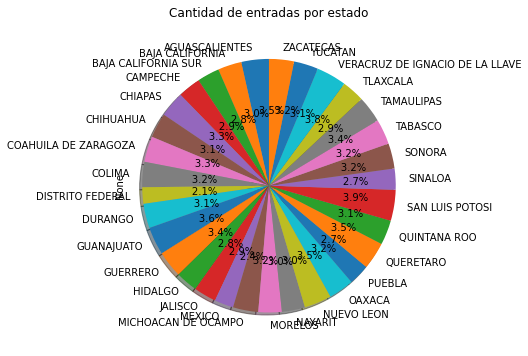

In [14]:
color_list =['gold','yellowgreen', 'ligghtcoral','lightskyblue','lightgreen',
            'pink']
explode_list = [4]

df2.plot(kind='pie', figsize=(5,6), autopct='%10.1f%%',
                           startangle=90, shadow=True)
plt.title('Cantidad de entradas por estado')
plt.axis('Equal')

plt.show()